Summary: Occurences of differences were observed for different ranges of feature LSTAT, which is mainly responsible for the differences.
- For values between 3.2 and 10.15, A may predict 1 while B predicts 2,
- for values between 3.5 and 13.3, A may predict 2 while B predicts 1,
- for values above 6.75, A may predict 0 while B predicts 1.

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import print_rules
from tasks.boston_housing import make_task3 as make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

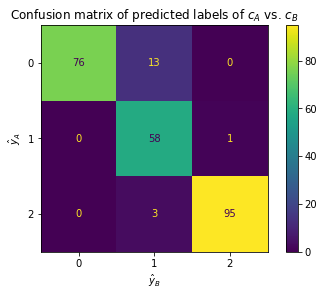

In [4]:
comparer.plot_confusion_matrix(X)

In [5]:
scale_features = {
    'LSTAT': 10,
    'ZN': 1,
    'INDUS': 10,
    'CRIM': 10,
    'TAX': 1,
    'RM': 10,
    'RAD': 1,
    'DIS': 10,
    'AGE': 1,
    'PTRATIO': 10,
    'NOX': 100
}

# Global explanations

## $(0,1)$

In [6]:
focus_class = '(0, 1)'

In [19]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 49.9 s, sys: 278 ms, total: 50.2 s
Wall time: 52.8 s


In [20]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [21]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [22]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [23]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

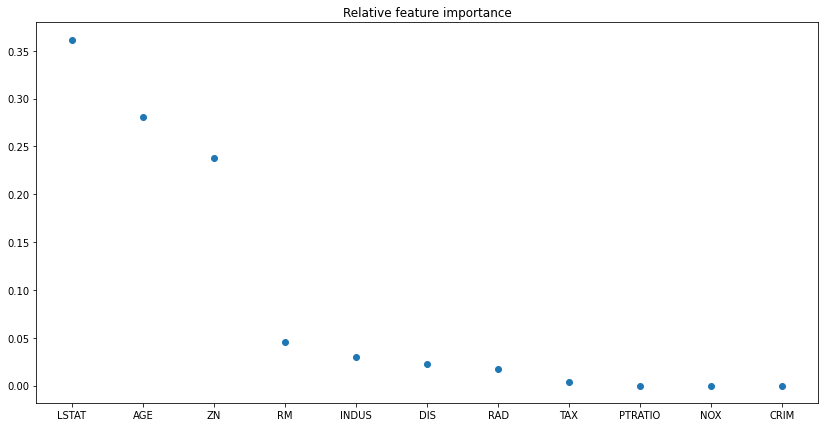

In [24]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

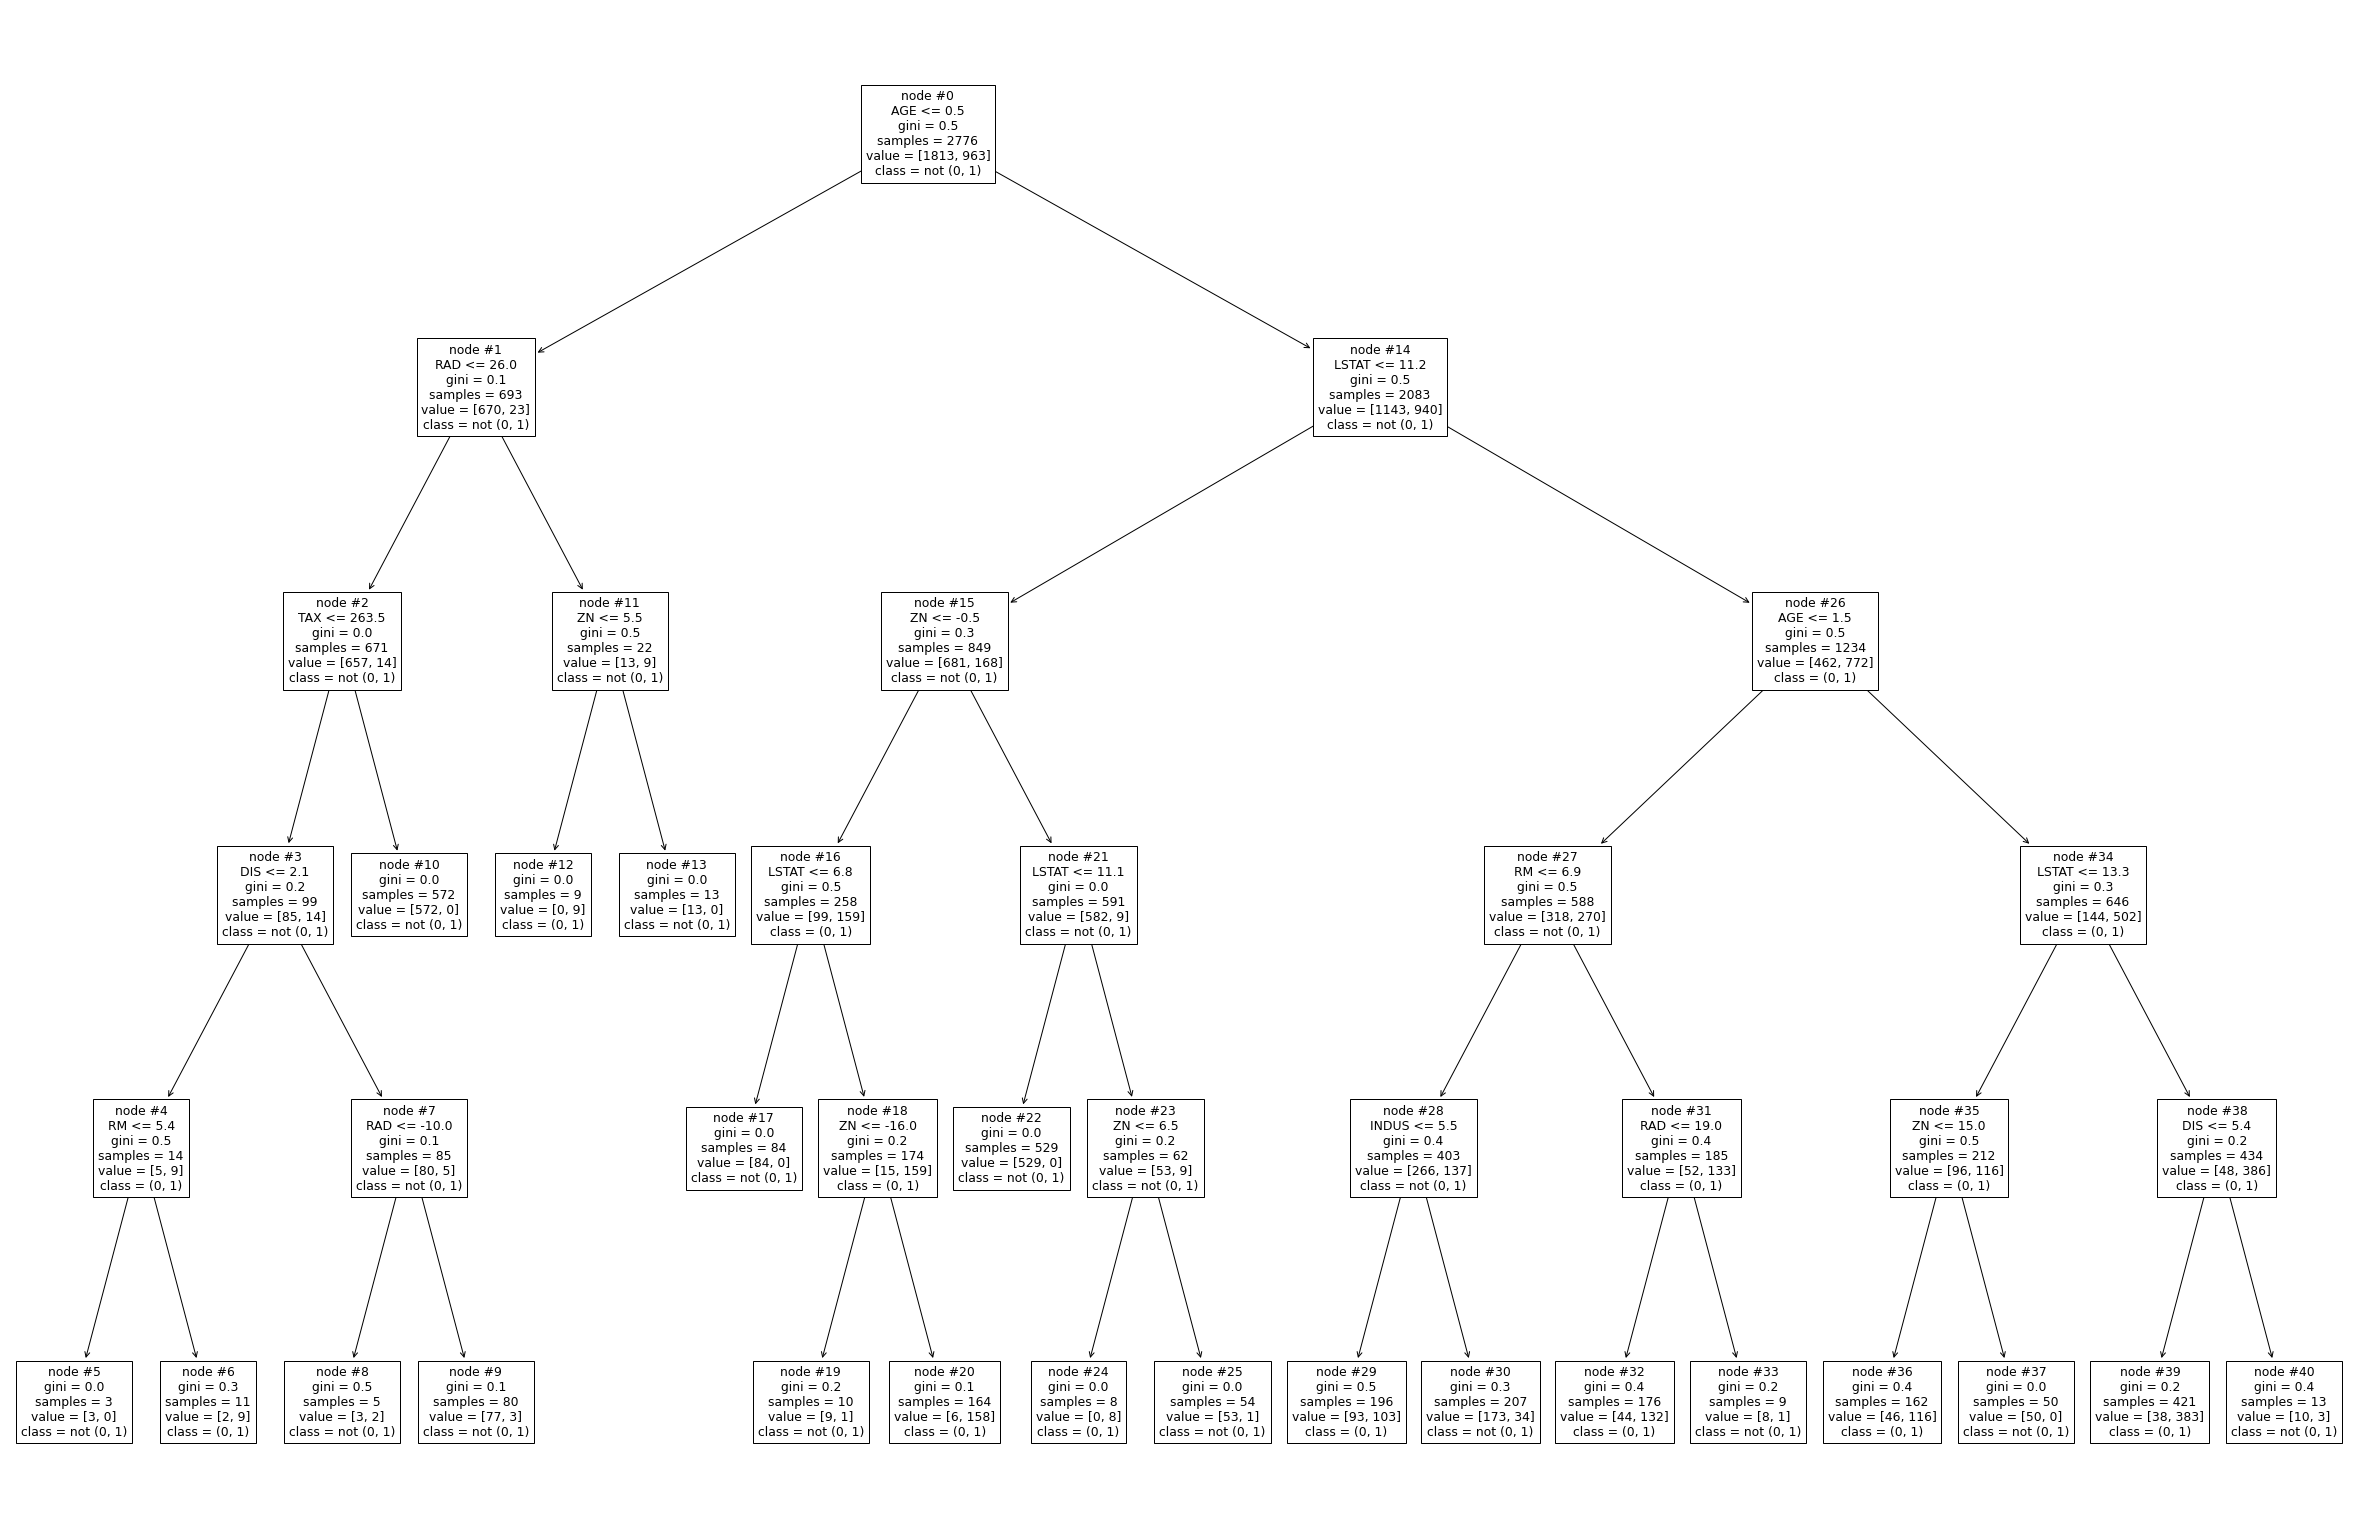

In [25]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [26]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #39: if (LSTAT > 13.35) and (AGE > 1.5) and (DIS <= 5.35) then class: (0, 1) (383/421 instances)
node #29: if (LSTAT > 11.15) and (AGE > 0.5) and (AGE <= 1.5) and (RM <= 6.85) and (INDUS <= 5.45) then class: (0, 1) (103/196 instances)
node #32: if (LSTAT > 11.15) and (AGE > 0.5) and (AGE <= 1.5) and (RM > 6.85) and (RAD <= 19.0) then class: (0, 1) (132/176 instances)
node #20: if (LSTAT > 6.75) and (LSTAT <= 11.15) and (AGE > 0.5) and (ZN > -16.0) and (ZN <= -0.5) then class: (0, 1) (158/164 instances)
node #36: if (LSTAT > 11.15) and (LSTAT <= 13.35) and (AGE > 1.5) and (ZN <= 15.0) then class: (0, 1) (116/162 instances)
node #6: if (AGE <= 0.5) and (RM > 5.35) and (DIS <= 2.1) and (RAD <= 26.0) and (TAX <= 263.5) then class: (0, 1) (9/11 instances)
node #12: if (AGE <= 0.5) and (ZN <= 5.5) and (RAD > 26.0) then class: (0, 1) (9/9 instances)
node #24: if (LSTAT > 11.05) and (LSTAT <= 11.15) and (AGE > 0.5) and (ZN > -0.5) and (ZN <= 6.5) then class: (0, 1) (8/8 instances)


In [27]:
pd.Series(class_names[y_explain]).value_counts()

not (0, 1)    1813
(0, 1)         963
dtype: int64

In [43]:
(383+103+132+158+116)/963

0.9262720664589823

The first five rules cover the majority of the instances classified $(0,1)$.

Summary: For values of LSTAT above 6.75.

## $(1,2)$

In [29]:
focus_class = '(1, 2)'

In [30]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 54.6 s, sys: 557 ms, total: 55.2 s
Wall time: 57 s


In [31]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [32]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [33]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [34]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

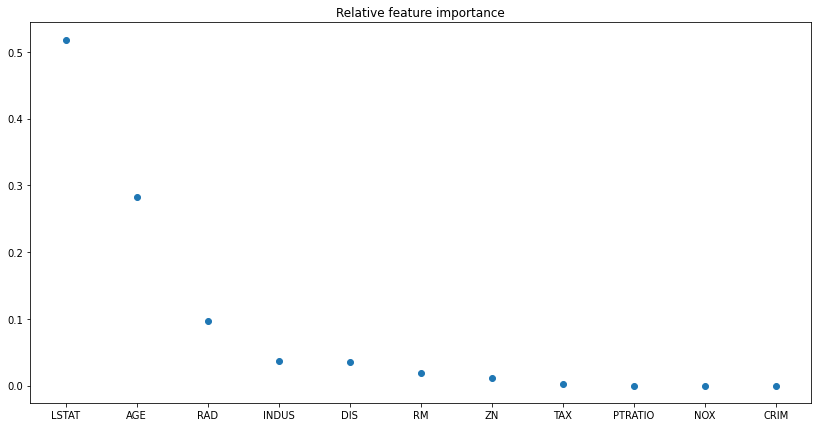

In [35]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

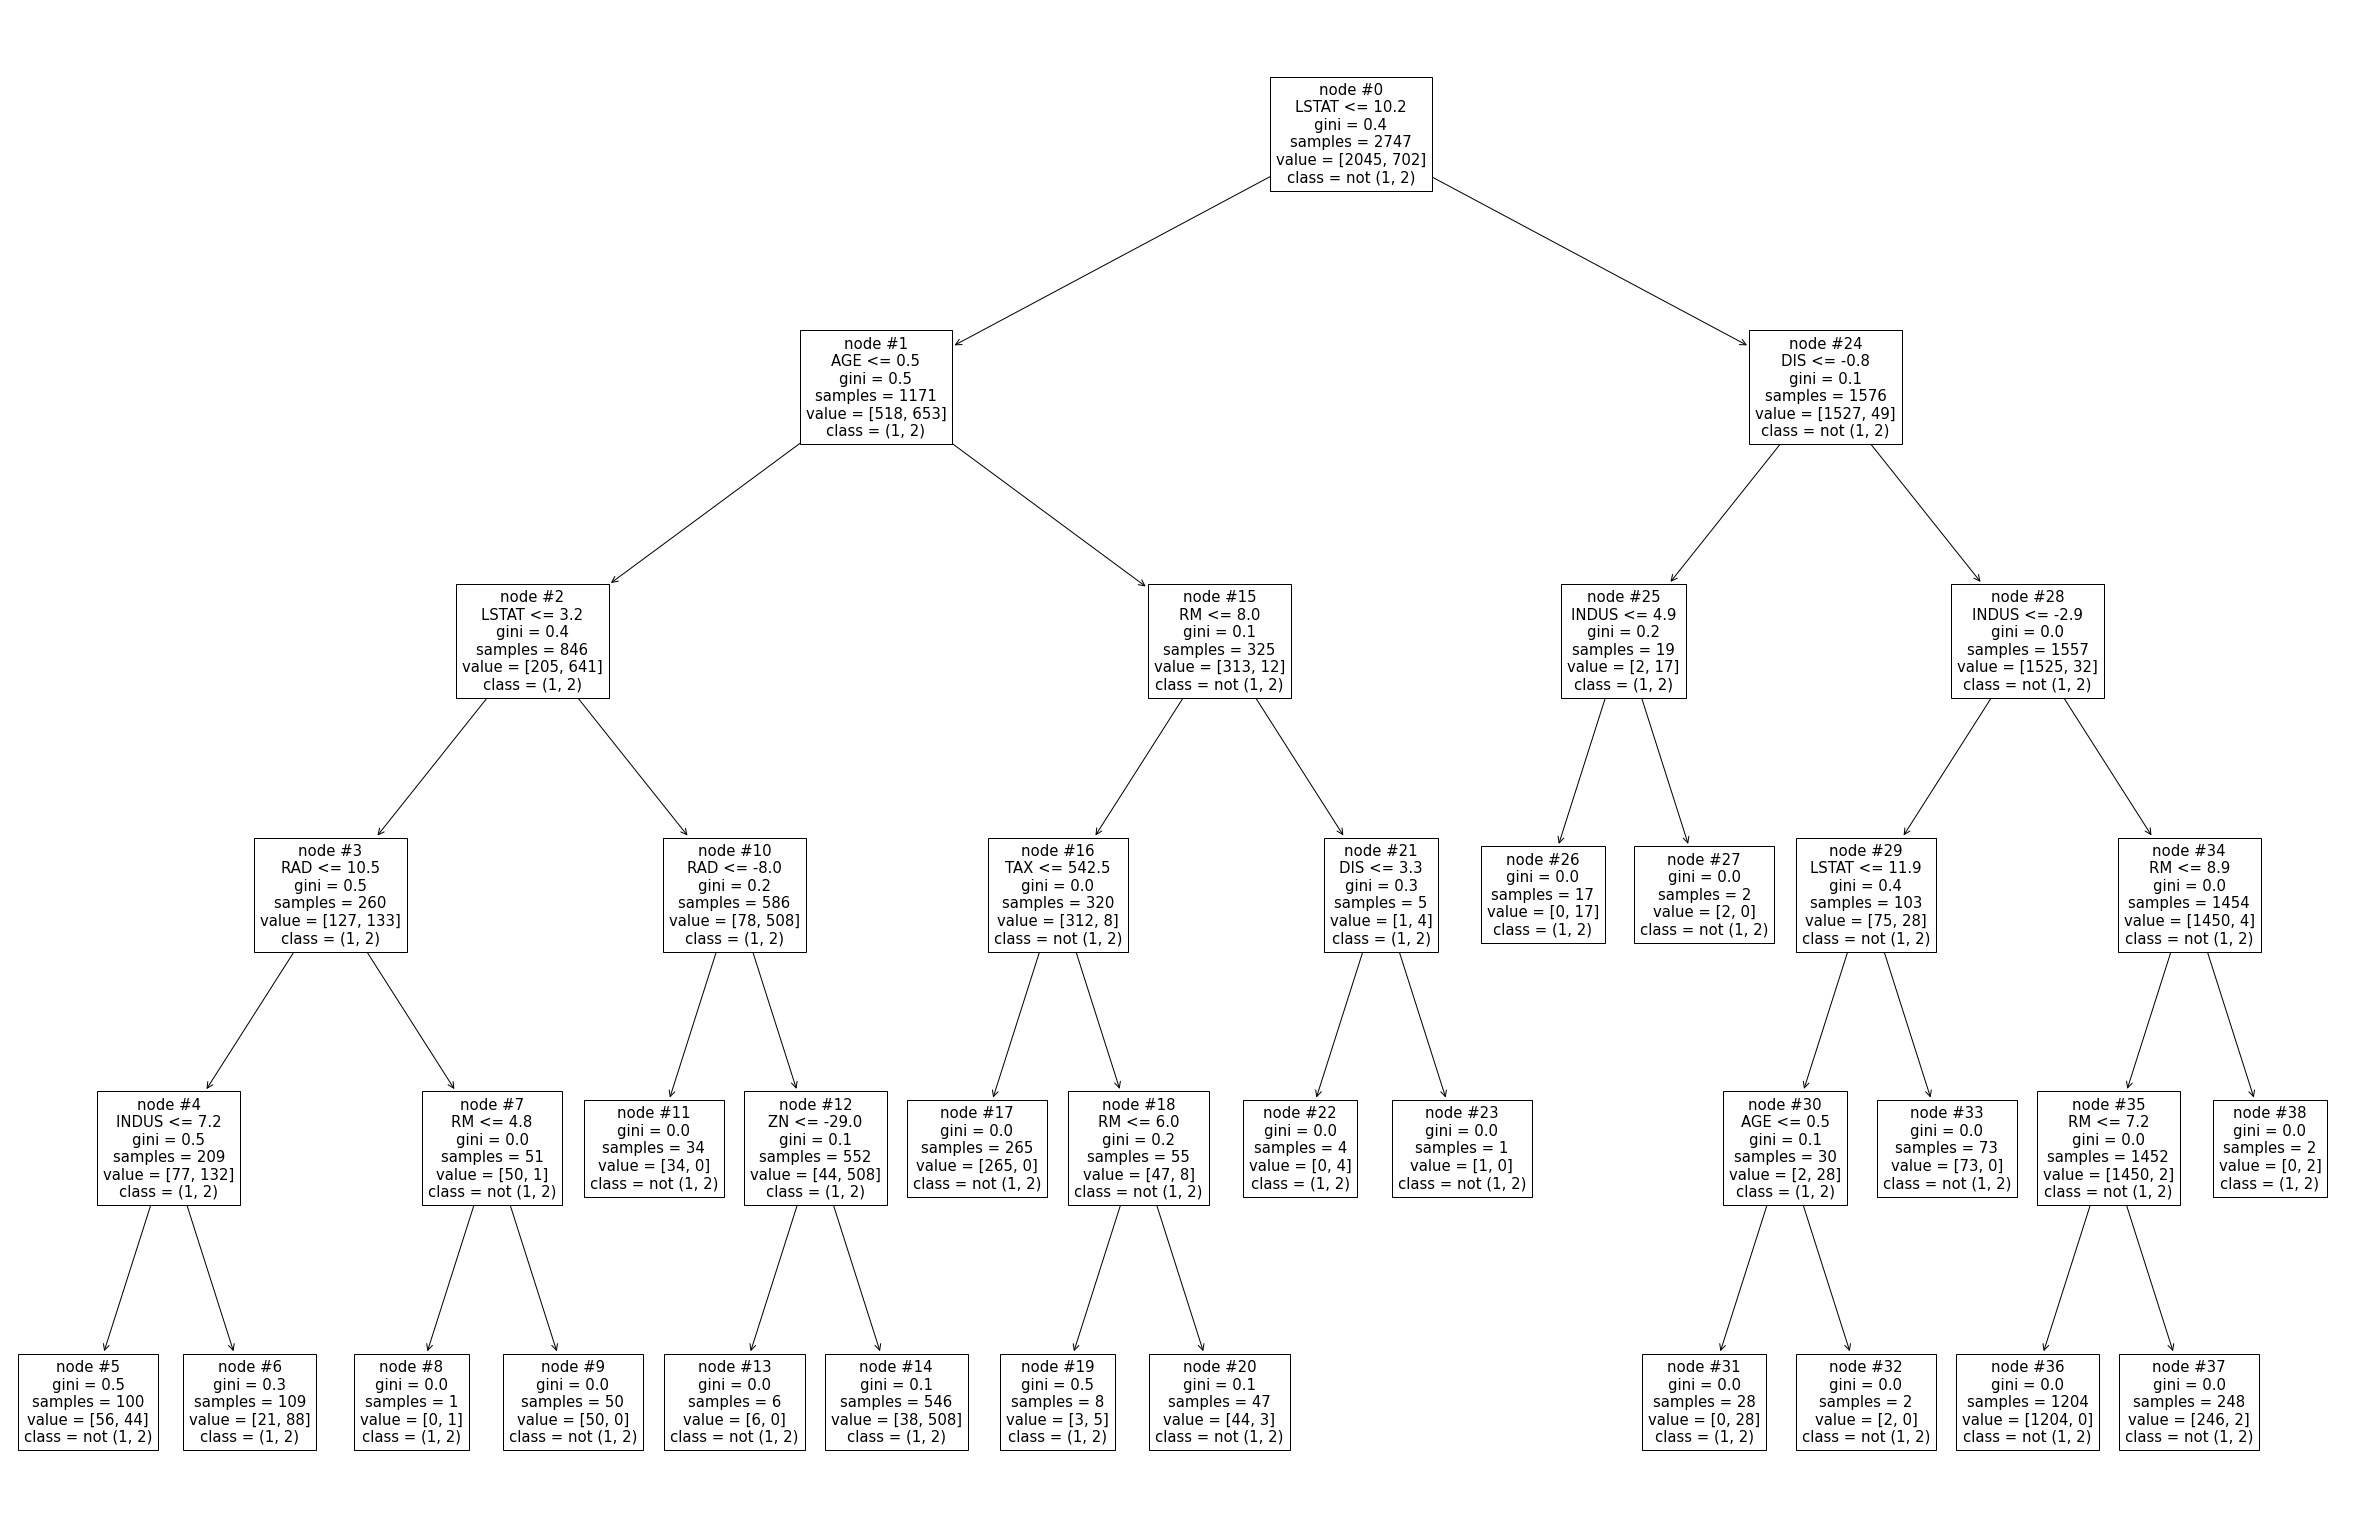

In [36]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [37]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #14: if (LSTAT > 3.2) and (LSTAT <= 10.15) and (AGE <= 0.5) and (RAD > -8.0) and (ZN > -29.0) then class: (1, 2) (508/546 instances)
node #6: if (LSTAT <= 3.2) and (AGE <= 0.5) and (RAD <= 10.5) and (INDUS > 7.25) then class: (1, 2) (88/109 instances)
node #31: if (LSTAT > 10.15) and (LSTAT <= 11.9) and (AGE <= 0.5) and (INDUS <= -2.9) and (DIS > -0.85) then class: (1, 2) (28/28 instances)
node #26: if (LSTAT > 10.15) and (INDUS <= 4.85) and (DIS <= -0.85) then class: (1, 2) (17/17 instances)
node #19: if (LSTAT <= 10.15) and (AGE > 0.5) and (RM <= 5.95) and (TAX > 542.5) then class: (1, 2) (5/8 instances)
node #22: if (LSTAT <= 10.15) and (AGE > 0.5) and (DIS <= 3.35) and (RM > 8.0) then class: (1, 2) (4/4 instances)
node #38: if (LSTAT > 10.15) and (INDUS > -2.9) and (DIS > -0.85) and (RM > 8.95) then class: (1, 2) (2/2 instances)
node #8: if (LSTAT <= 3.2) and (AGE <= 0.5) and (RAD > 10.5) and (RM <= 4.75) then class: (1, 2) (1/1 instances)


In [38]:
pd.Series(class_names[y_explain]).value_counts()

not (1, 2)    2045
(1, 2)         702
dtype: int64

In [42]:
508/702

0.7236467236467237

The first rule covers the majority of the instances classified $(1,2)$.

Summary: For LSTAT between 3.2 and 10.15

## $(2,1)$

In [44]:
focus_class = '(2, 1)'

In [45]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global',
                                          scale_features=scale_features,
                                          focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 49.2 s, sys: 305 ms, total: 49.5 s
Wall time: 49.9 s


In [46]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [47]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']

In [48]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_explain, y_explain)
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [49]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

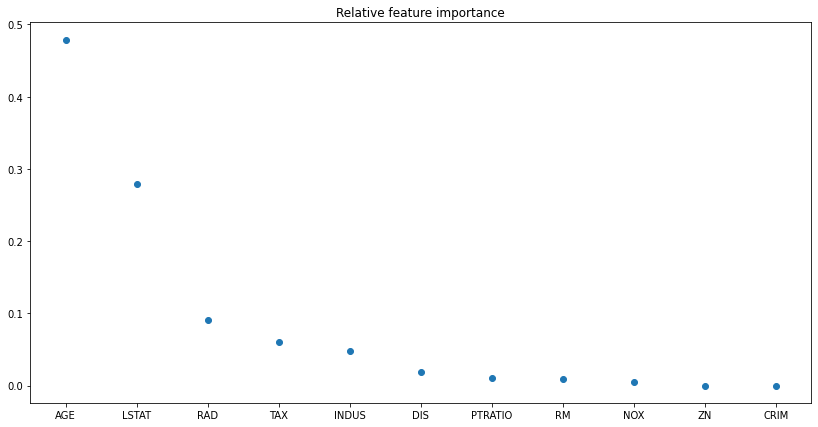

In [50]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

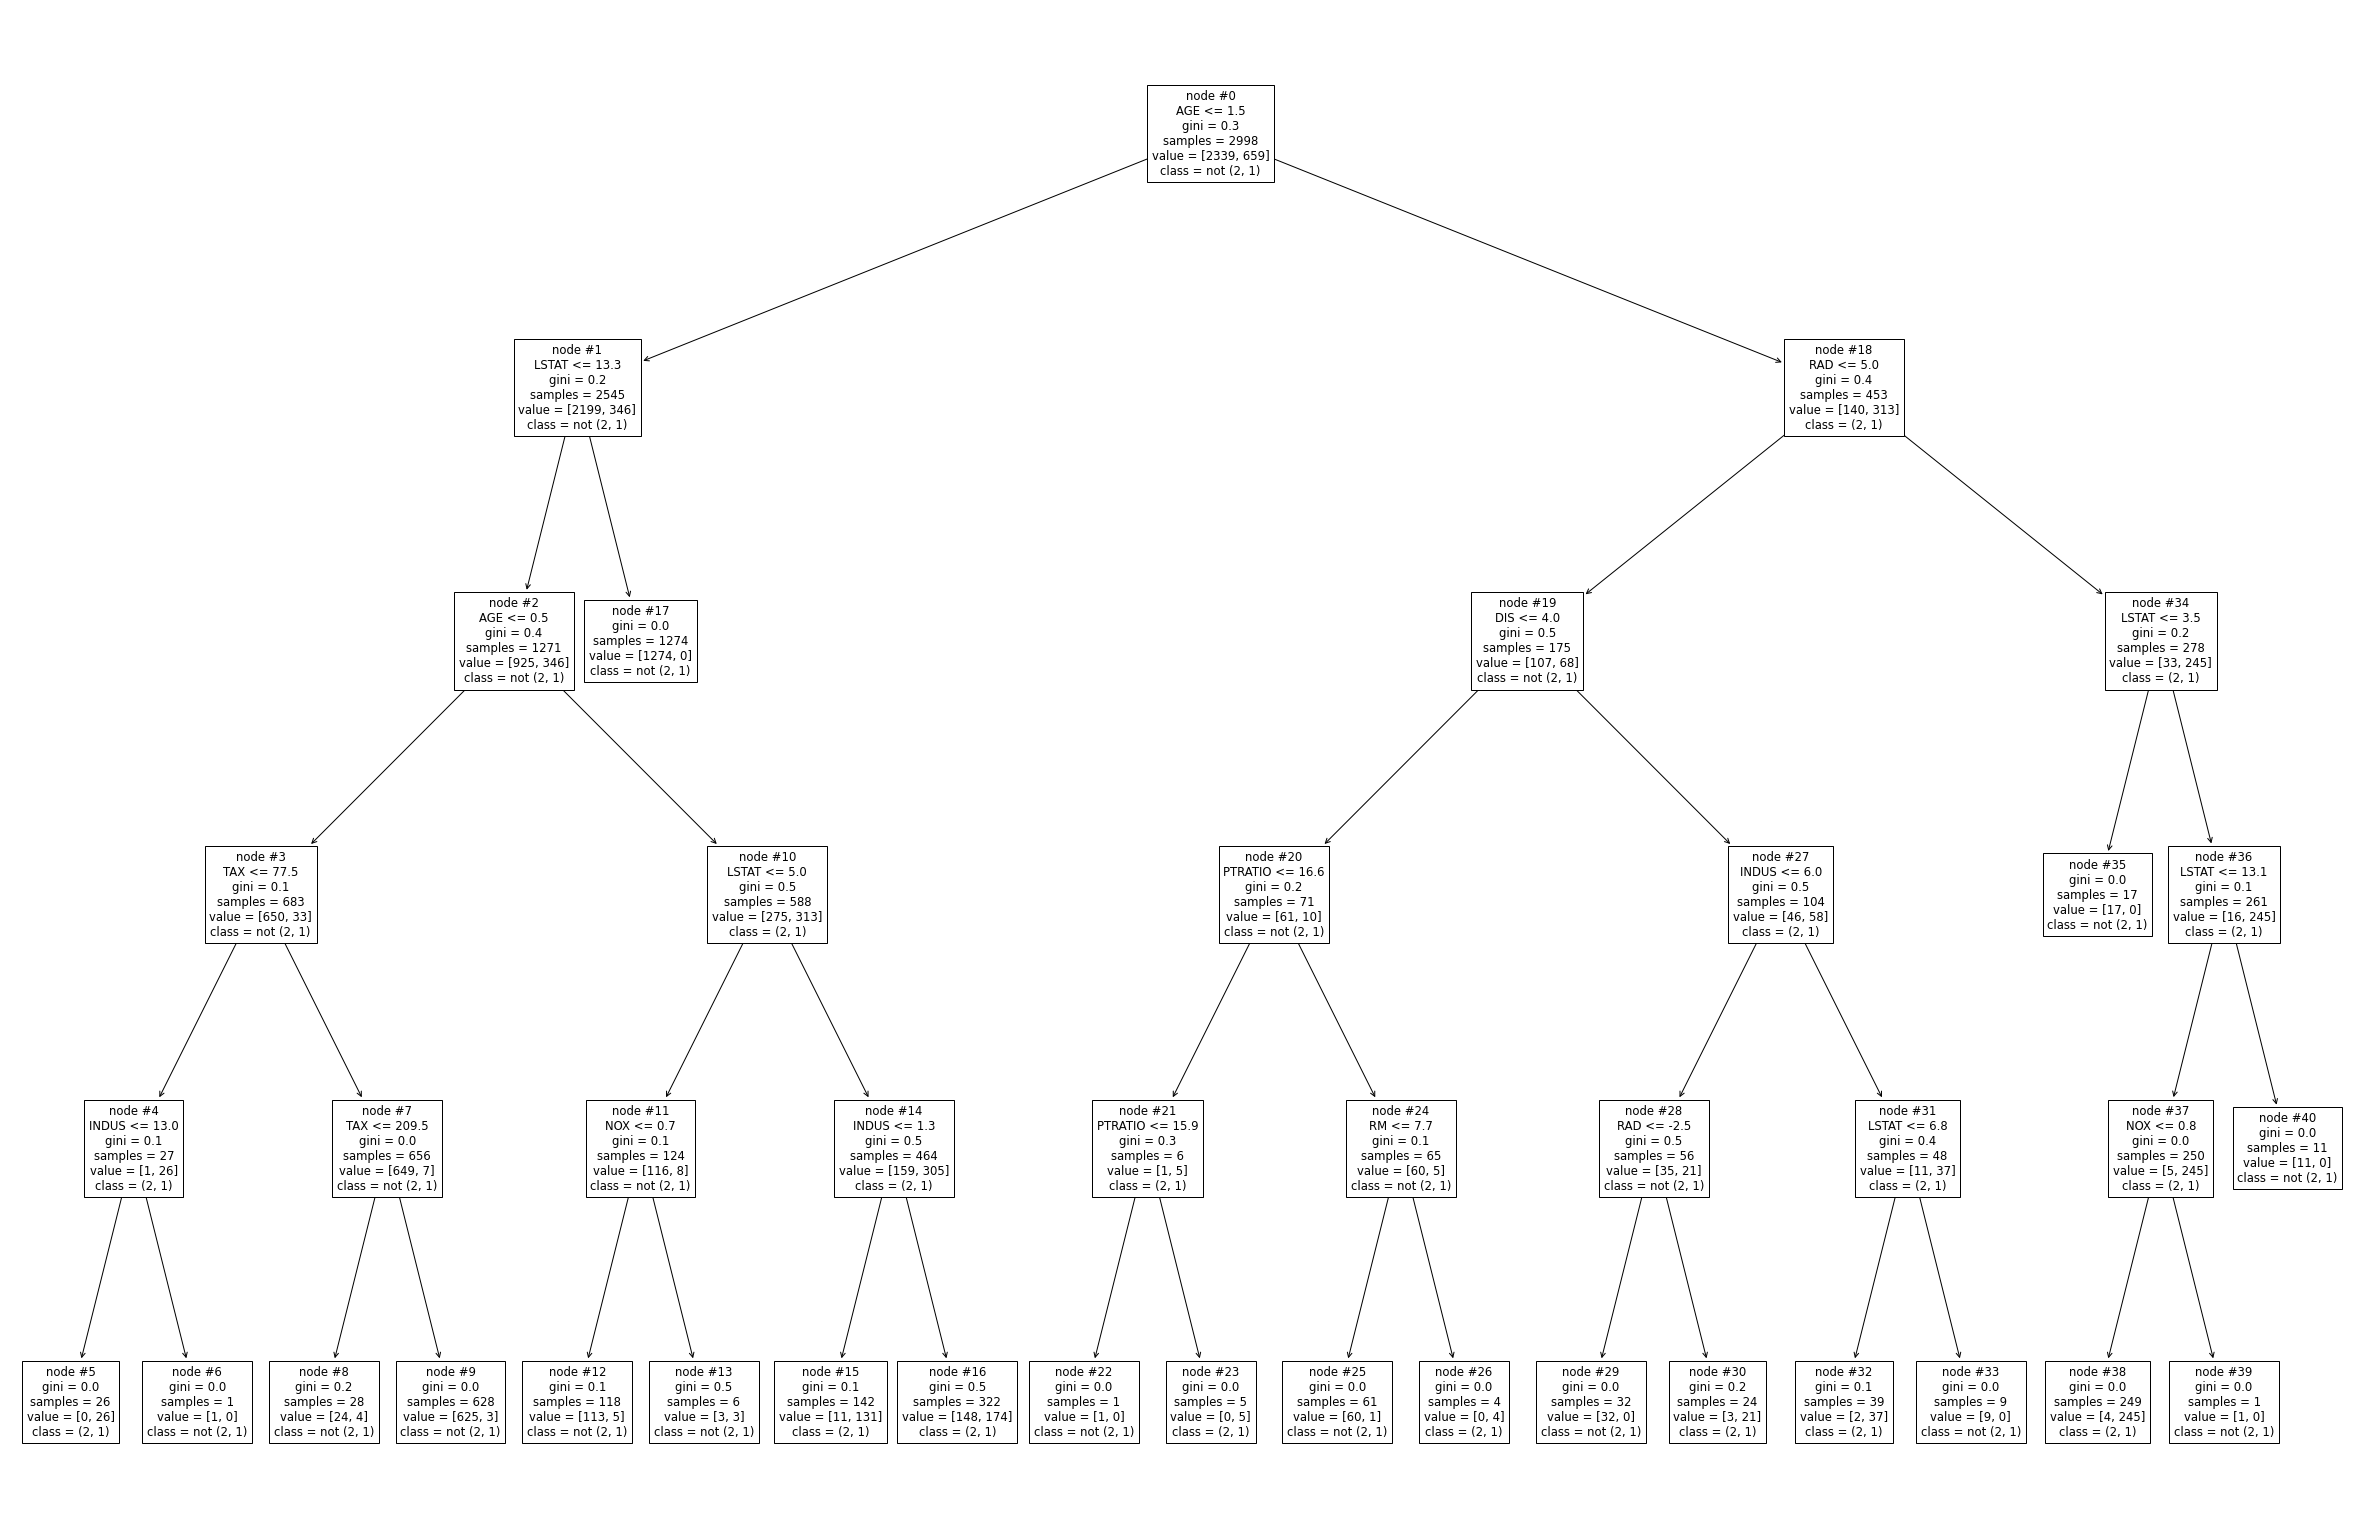

In [51]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [52]:
print_rules(tree, feature_names, class_names, focus_class, feature_order)

node #16: if (AGE > 0.5) and (AGE <= 1.5) and (LSTAT > 5.0) and (LSTAT <= 13.3) and (INDUS > 1.35) then class: (2, 1) (174/322 instances)
node #38: if (AGE > 1.5) and (LSTAT > 3.5) and (LSTAT <= 13.15) and (RAD > 5.0) and (NOX <= 0.825) then class: (2, 1) (245/249 instances)
node #15: if (AGE > 0.5) and (AGE <= 1.5) and (LSTAT > 5.0) and (LSTAT <= 13.3) and (INDUS <= 1.35) then class: (2, 1) (131/142 instances)
node #32: if (AGE > 1.5) and (LSTAT <= 6.8) and (RAD <= 5.0) and (INDUS > 5.95) and (DIS > 4.0) then class: (2, 1) (37/39 instances)
node #5: if (AGE <= 0.5) and (LSTAT <= 13.3) and (TAX <= 77.5) and (INDUS <= 13.0) then class: (2, 1) (26/26 instances)
node #30: if (AGE > 1.5) and (RAD > -2.5) and (RAD <= 5.0) and (INDUS <= 5.95) and (DIS > 4.0) then class: (2, 1) (21/24 instances)
node #23: if (AGE > 1.5) and (RAD <= 5.0) and (DIS <= 4.0) and (PTRATIO > 15.9) and (PTRATIO <= 16.65) then class: (2, 1) (5/5 instances)
node #26: if (AGE > 1.5) and (RAD <= 5.0) and (DIS <= 4.0) and

In [53]:
pd.Series(class_names[y_explain]).value_counts()

not (2, 1)    2339
(2, 1)         659
dtype: int64

In [55]:
(174+245+131)/659

0.834597875569044

The first three rules cover the majority of the instances classified $(2,1)$.

Summary: For LSTAT between 3.5 and 13.3